In [1]:
import numpy as np
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field/src/lib')
from lib.lib_tmd_model import setParams
from lib.lib_solvers import solve_self_consistent_k_space
from lib.lib_init_cond import *
from lib.lib_plot import showBandStructure, showGrandpotentialMinimization,\
showMagProf, showWF

# Set the desired parameters

tmd : choose the TMD (MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2)

Nk : Number of ks

Ny : Number of atoms along the transverse direction

nHole : Density of holes (to study a hole-doped system)

invTemp : Inverse temperature (if we set it very high, we get T = 0)

betaStart : Inverse temperature at which the annealing starts

betaSpeed : This parameter (> 1) regulates the speed of the annealing

betaThreshold: The point at which annealing stops (and after which we jump to the desired temperature - maybe zero!)

U : On-site interaction

itMax : Maximum allowed number of iterations

dyn : 'kick' (random small deviation), 'local' (local update), 'mixed' (both), 'wait' (both, waiting for a while)

singleExcitationFreq : How often to shake up the Markovian dynamics

osc : Oscillations in the annealing scheme

dampFreq : Frequency of the damping

delta : Tolerance for updated densities convergence

nUp, nDown = ferro(...) : Initial condition

In [2]:
# Number of orbitals in the model
nOrb = 3

# Dimensions of the ribbon
Ny = 16

# Number of k-points used
Nk = 512

# Model parameters
t = 1
U = 20

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = True
osc = False

# Inverse temperature and annealing parameters
invTemp = 'infty'
betaStart = 0.1
betaSpeed = 1.2
betaThreshold = 50

# Solver parameters
itMax = 50
dampFreq = 1
delta = 1e-6
singleExcitationFreq = itMax
dyn = 'wait'

# Initial conditions
seed = 124190212
nUp, nDown = ferro_sign_switch(2 / 3, nOrb * Ny)

# Show initial condition

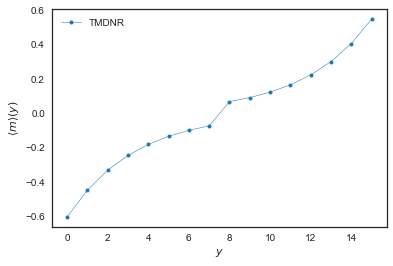

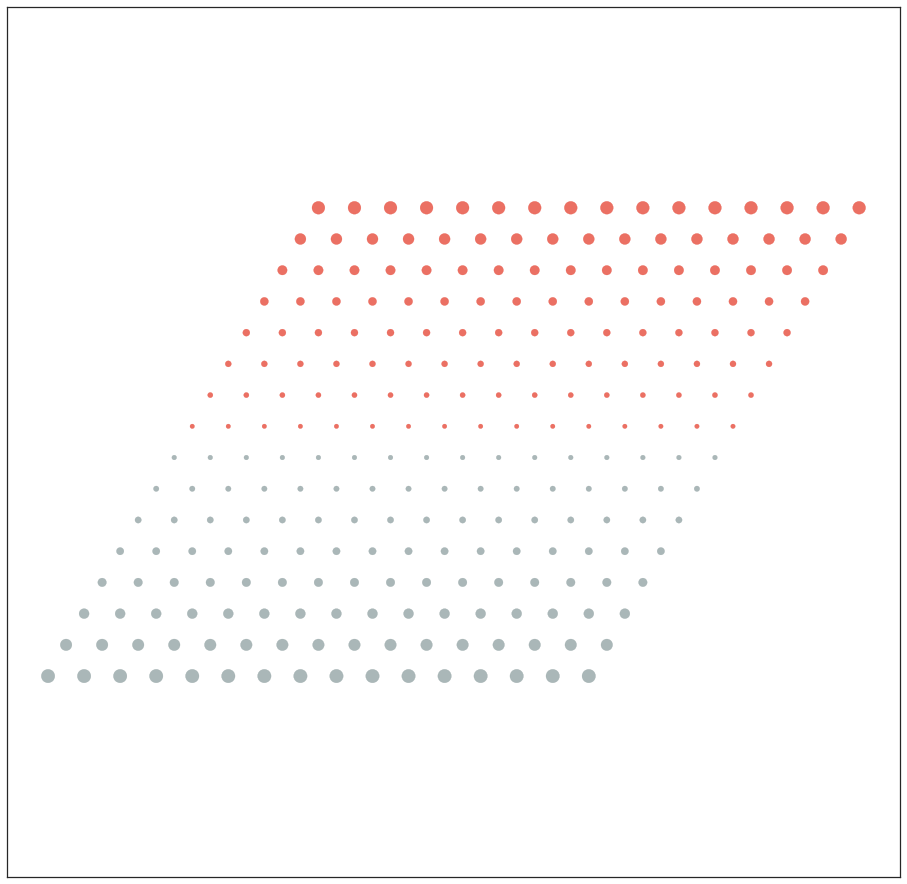

In [3]:
dotscale = 100
longLength = 16
showMagProf(nUp, nDown, Ny, nOrb, dotscale, longLength)

# Iterative mean field solution

In [4]:
%%time
nUp, nDown, energies,\
lastGrandpotential, itSwitch, lastIt, mu, abs_t0,\
eUp, eDown, wfUp, wfDown\
= solve_self_consistent_k_space(abs_t0, e1, e2, t0, t1, t2, t11, t12, t22,\
                                  Nk, Ny, nOrb, nHole,\
                                  invTemp, betaStart, betaSpeed, betaThreshold,\
                                  anneal_or_not, U, itMax, dampFreq, dyn,\
                                  singleExcitationFreq, osc, delta, nUp, nDown)

Started annealing.

Inverse temperature:  0.09999999999999998
iteration:  0
deltaUp:  0.41230003434
deltaDown:  0.339911730403
Inverse temperature:  0.29999999999999993
Inverse temperature:  0.5399999999999999
Inverse temperature:  0.8279999999999997
Inverse temperature:  1.1736
Inverse temperature:  1.5883199999999995
Inverse temperature:  2.0859839999999994
Inverse temperature:  2.6831807999999993
Inverse temperature:  3.3998169599999986
Inverse temperature:  4.259780351999998
Inverse temperature:  5.291736422399997
iteration:  10
deltaUp:  5.54842615563e-05
deltaDown:  7.10103867358e-05
Inverse temperature:  6.530083706879997
Inverse temperature:  8.016100448255996
Inverse temperature:  9.799320537907194
Inverse temperature:  11.939184645488632
Inverse temperature:  14.507021574586359
Inverse temperature:  17.588425889503633
Inverse temperature:  21.286111067404356
Inverse temperature:  25.723333280885228
Inverse temperature:  31.047999937062272
Inverse temperature:  37.437599924474

# Band structure

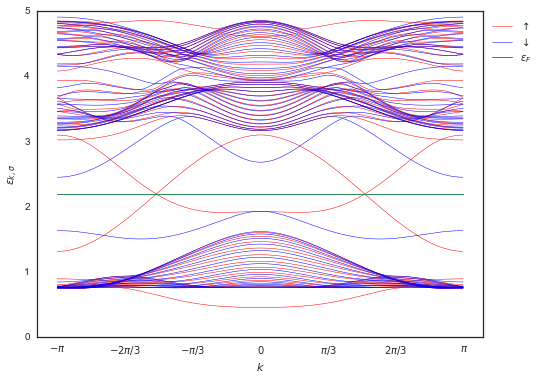

In [5]:
showBandStructure(Nk, abs_t0, eUp, eDown, mu)

# Show solution

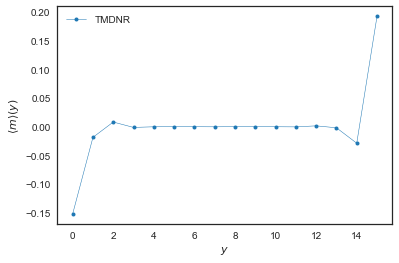

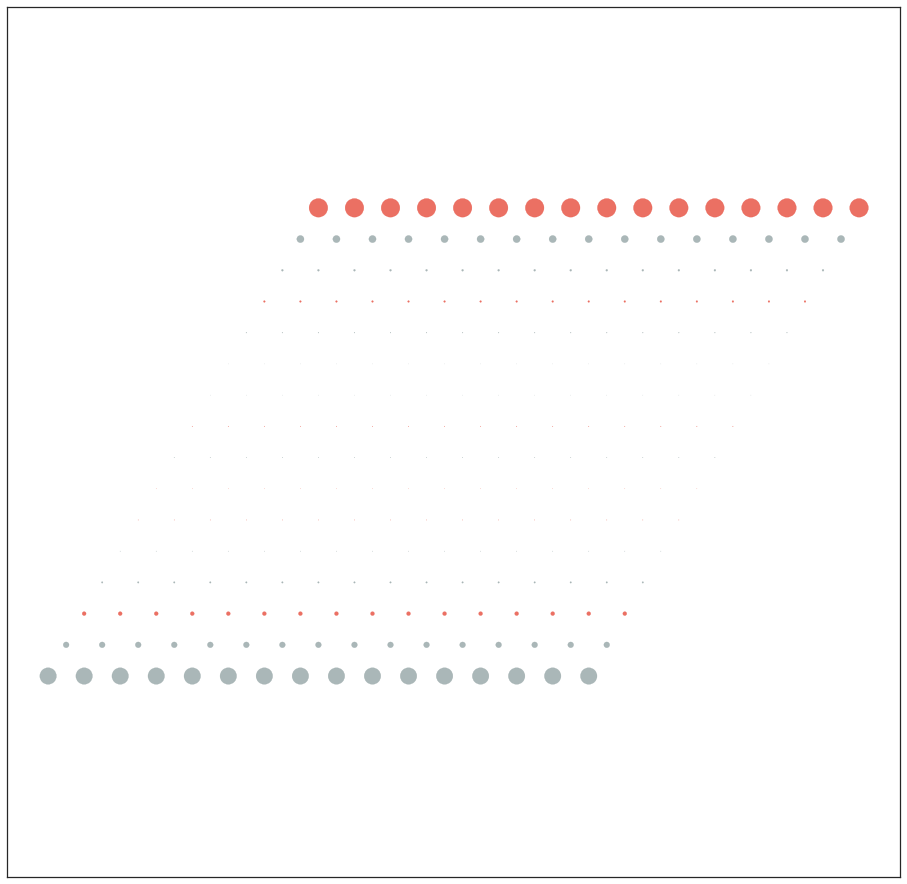

In [6]:
dotscale = 600
longLength = 16
showMagProf(nUp, nDown, Ny, nOrb, dotscale, longLength)

# Grandpotential minimization

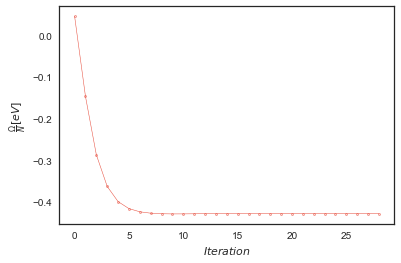

In [7]:
showGrandpotentialMinimization(lastIt, energies)

In [8]:
lastGrandpotential

-0.42776358521975627

# Edge-states

In [19]:
Kpoint = 1.6
Ktol = 0.2
Eedge = 1.5
Etol = 0.2
showWF(wfUp, wfDown, Nk, Ny, nOrb, Kpoint, Ktol, Eedge, Etol, eUp, eDown, abs_t0)

IndexError: index 0 is out of bounds for axis 0 with size 0